In [113]:
# Dependencies for this notebook
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Ignore warning for this project
import warnings
warnings.filterwarnings("ignore")

# Exploration Phase Hills Dataset
The purpose of this notebook is to explore the dataset and getting to know what the particularities are. We will try to find duplications, missing values and outliers also the datatypes will be visualized. We start by loading one of the available datasets. You can switch datasets if desired by modifying `dataset_path`.

In [114]:
#dataset_path = "data/Lijn 1 laaste 12 maanden.csv"
#dataset_path = "data/Lijn 2 laatste 12 maanden.csv"
dataset_path = "../data/20231120 Dataset Dieten met density.csv"

# Load the dataset
df = pd.read_csv(dataset_path, sep=";", decimal=",")

# Print information about the dataset like column names, amount of rows and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41700 entries, 0 to 41699
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Line 1   41700 non-null  int64  
 1   Line 2   41700 non-null  int64  
 2   Line 3   41700 non-null  int64  
 3   Density  41700 non-null  int64  
 4   OUT      41700 non-null  float64
 5   PV       41700 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.9 MB


Some column names are prefixed with the production line number and some title. We would like to keep these generic over all datasets. The next block of code will rename these column names to a generic form. The datatypes are looking great and do not need to be transformed yet.

In [115]:
# Rename the column names to universal 
# names over the different datasets using this mapper
def column_mapper(column):
	parts = column.split('.')
	return parts[len(parts)-1]

# Rename the column names
df = df.rename(columns = column_mapper)

# Print the first 5 rows
df.head()

,Line 1,Line 2,Line 3,Density,OUT,PV
0,1,0,0,400,41.545952,6943.283203
1,1,0,0,400,41.384624,7074.542969
2,1,0,0,432,41.783543,6951.166016
3,1,0,0,432,42.168964,6951.954102
4,1,0,0,432,41.853916,7071.642578


## Finding missing values
The next step is to find missing values we will search for these values using the `isna()` method.

In [116]:
#df.isna().sum()
df.isnull().sum()

Line 1     0
Line 2     0
Line 3     0
Density    0
OUT        0
PV         0
dtype: int64

## Finding outliers
We can use the describe() method to get more information about the numeric values in a dataframe. <br/>By comparing the min and max values with the mean of the Resting column we can say that the values are not evenly distributed and therfore need to be analysed futher.

In [117]:
# Converting the datetime column from str type to datetime type
#df.DateTime = pd.to_datetime(df.DateTime, format='%m/%d/%Y %I:%M:%S %p')

# Describe table
df.describe()

,Line 1,Line 2,Line 3,Density,OUT,PV
count,41700.000000,41700.000000,41700.000000,41700.000000,41700.000000,41700.000000
mean,0.329928,0.337914,0.332158,415.435012,47.632931,8074.758486
std,0.470192,0.473005,0.470993,55.826187,11.717120,1249.527602
min,0.000000,0.000000,0.000000,320.000000,20.561691,4951.650879
25%,0.000000,0.000000,0.000000,376.000000,38.211220,7015.909180
50%,0.000000,0.000000,0.000000,416.000000,47.016153,7958.921631
75%,1.000000,1.000000,1.000000,456.000000,56.230700,8861.649658
max,1.000000,1.000000,1.000000,528.000000,80.000000,11480.457030


Text(0.5, 1.0, 'Dry_Feed_Rate_PID.OUT Outliers')

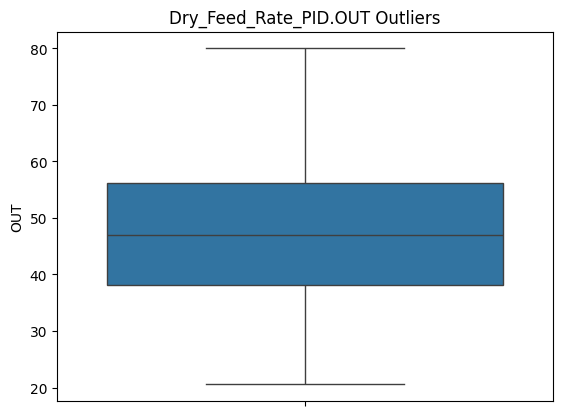

In [118]:
sns.boxplot(df["OUT"]).set_title("Dry_Feed_Rate_PID.OUT Outliers")

In [119]:
df[df["OUT"] < 1].head()

,Line 1,Line 2,Line 3,Density,OUT,PV


Text(0.5, 1.0, 'Dry_Feed_Rate_PID.PV Outliers')

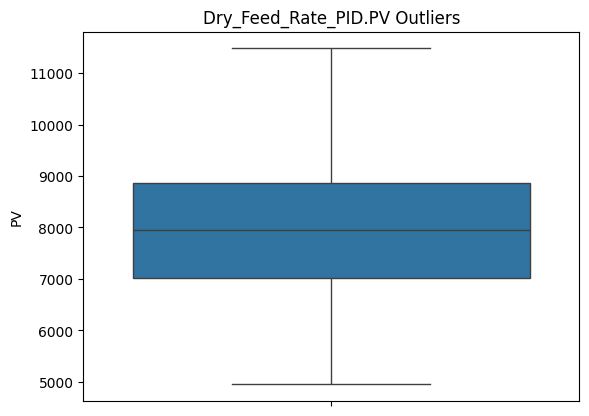

In [120]:
sns.boxplot(df["PV"]).set_title("Dry_Feed_Rate_PID.PV Outliers")

In [121]:
df[df["PV"] > 30000].head()

,Line 1,Line 2,Line 3,Density,OUT,PV


<Axes: ylabel='Density'>

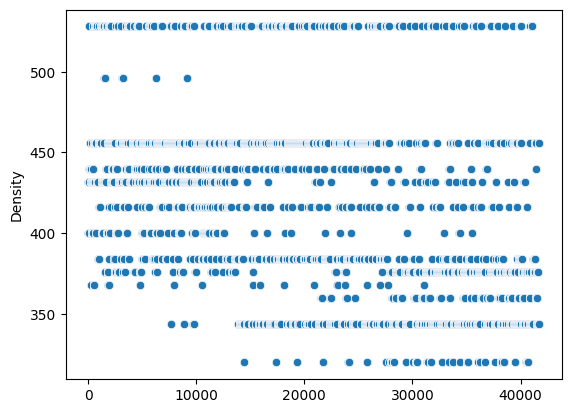

In [122]:
sns.scatterplot(df["Density"])

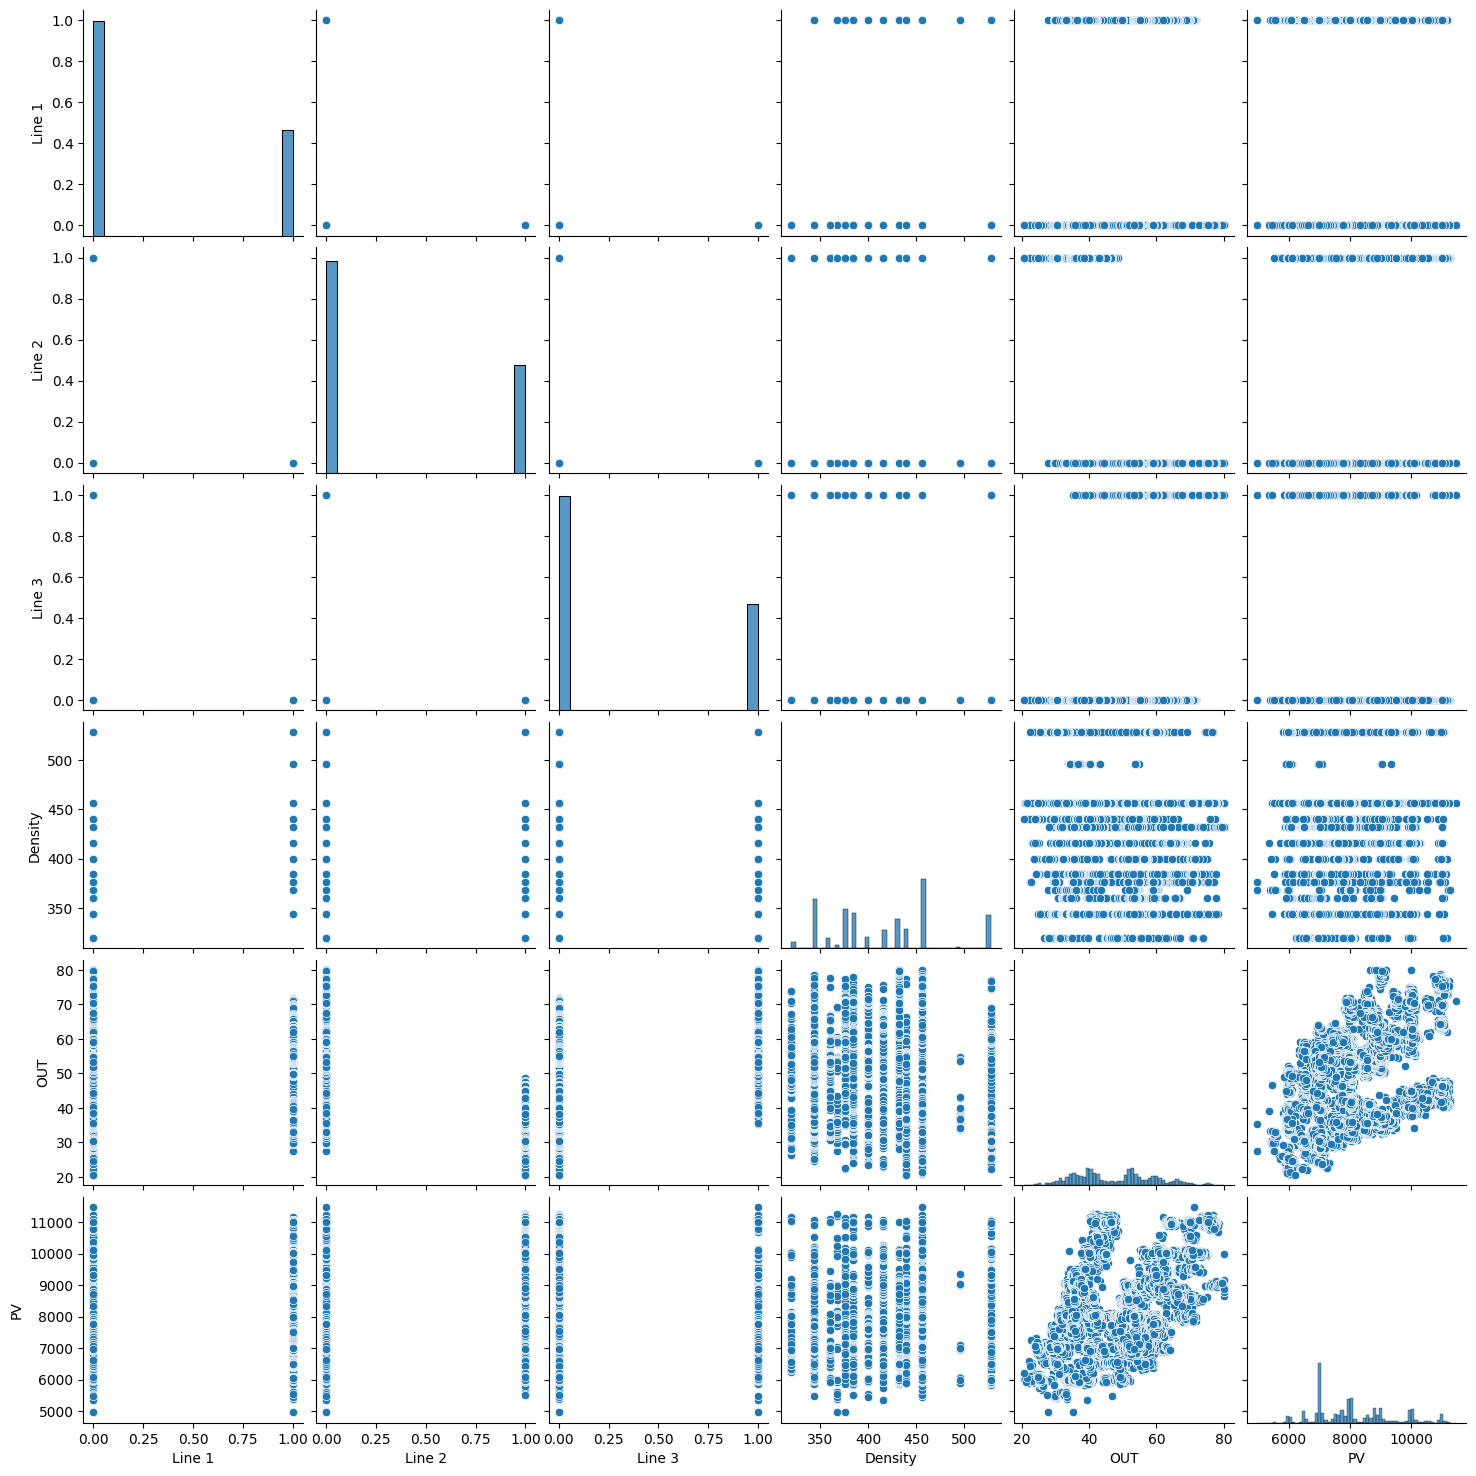

In [123]:

doi = df
sns.pairplot(doi, kind="scatter")
plt.show()

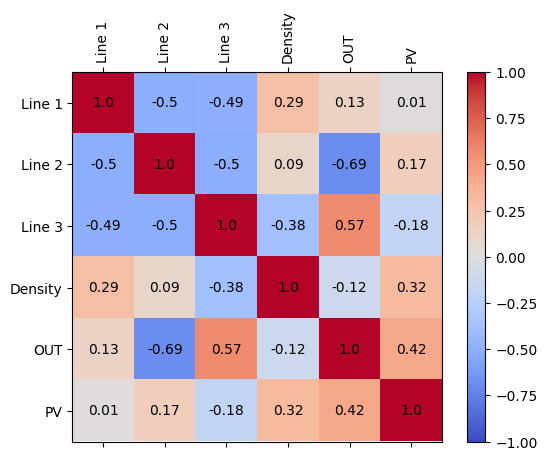

In [124]:
corr = doi.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(doi.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(doi.columns)
ax.set_yticklabels(doi.columns)

for i in range(len(doi.columns)):
    for j in range(len(doi.columns)):
        text = ax.text(j, i, round(corr.iloc[i, j], 2),
			ha='center', va='center', color='black')
        
plt.show()

<Axes: xlabel='OUT', ylabel='PV'>

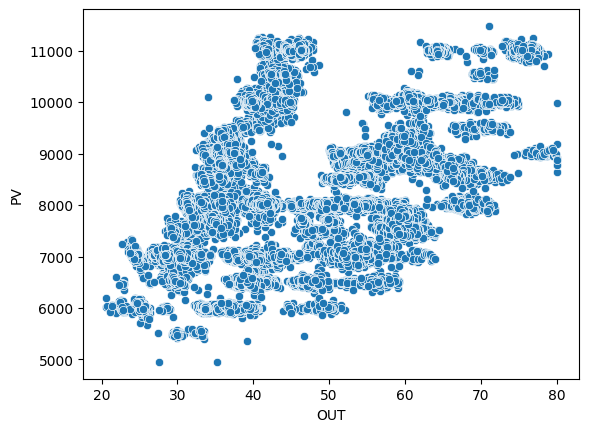

In [125]:
sns.scatterplot(data=df, x="OUT", y="PV" )

In [126]:
g = df.groupby(pd.Grouper(key='DateTime', freq='m'))
dfs = [group for _,group in g]

for i in range(0, len(dfs)):
	plt.figure(figsize=(12,6))
	plt.plot(dfs[i].DateTime, dfs[i].PV, label = "PV");
	plt.plot(dfs[i].DateTime, dfs[i].SP, label = "OUT");
	plt.legend()
	plt.grid()
	plt.xlabel('Date & time')
	plt.title('PV, SP over time')
	plt.show()

KeyError: 'The grouper name DateTime is not found'